In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_style("whitegrid")

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [70]:
df = pd.read_csv('gestures_data_3D+Haar.csv',index_col=0)
df.head()

,label,user,filename,time_range,x_mean,x_max,x_min,x_range,x_upturns,x_downturns,x_upcross,x_downcross,y_mean,y_max,y_min,y_range,y_upturns,y_downturns,y_upcross,y_downcross,z_mean,z_max,z_min,z_range,z_upturns,z_downturns,z_upcross,z_downcross,Mjerk_mean,Mjerk_max,Mjerk_min,Mjerk_range,Mjerk_upturns,Mjerk_downturns,Mjerk_upcross,Mjerk_downcross,Macc_mean,Macc_max,Macc_min,Macc_range,Macc_upturns,Macc_downturns,Macc_upcross,Macc_downcross,Mvel_mean,Mvel_max,Mvel_min,Mvel_range,Mvel_upturns,Mvel_downturns,Mvel_upcross,Mvel_downcross,Mdist_mean,Mdist_max,Mdist_min,Mdist_range,Mdist_upturns,Mdist_downturns,Mdist_upcross,Mdist_downcross,jerk0_mean,jerk0_max,jerk0_min,jerk0_range,jerk0_upturns,jerk0_downturns,jerk0_upcross,jerk0_downcross,jerk1_mean,jerk1_max,jerk1_min,jerk1_range,jerk1_upturns,jerk1_downturns,jerk1_upcross,jerk1_downcross,jerk2_mean,jerk2_max,jerk2_min,jerk2_range,jerk2_upturns,jerk2_downturns,jerk2_upcross,jerk2_downcross,acc_g0_mean,acc_g0_max,acc_g0_min,acc_g0_range,acc_g0_upturns,acc_g0_downturns,acc_g0_upcross,acc_g0_downcross,acc_g1_mean,acc_g1_max,acc_g1_min,acc_g1_range,acc_g1_upturns,acc_g1_downturns,acc_g1_upcross,acc_g1_downcross,acc_g2_mean,acc_g2_max,acc_g2_min,acc_g2_range,acc_g2_upturns,acc_g2_downturns,acc_g2_upcross,acc_g2_downcross,vel_g0_mean,vel_g0_max,vel_g0_min,vel_g0_range,vel_g0_upturns,vel_g0_downturns,vel_g0_upcross,vel_g0_downcross,vel_g1_mean,vel_g1_max,vel_g1_min,vel_g1_range,vel_g1_upturns,vel_g1_downturns,vel_g1_upcross,vel_g1_downcross,vel_g2_mean,vel_g2_max,vel_g2_min,vel_g2_range,vel_g2_upturns,vel_g2_downturns,vel_g2_upcross,vel_g2_downcross,pos_g0_mean,pos_g0_max,pos_g0_min,pos_g0_range,pos_g0_upturns,pos_g0_downturns,pos_g0_upcross,pos_g0_downcross,pos_g1_mean,pos_g1_max,pos_g1_min,pos_g1_range,pos_g1_upturns,pos_g1_downturns,pos_g1_upcross,pos_g1_downcross,pos_g2_mean,pos_g2_max,pos_g2_min,pos_g2_range,pos_g2_upturns,pos_g2_downturns,pos_g2_upcross,pos_g2_downcross,dim0-coef0,dim0-coef1,dim0-coef2,dim0-coef3,dim0-coef4,dim0-coef5,dim0-coef6,dim0-coef7,dim0-coef8,dim0-coef9,dim1-coef0,dim1-coef1,dim1-coef2,dim1-coef3,dim1-coef4,dim1-coef5,dim1-coef6,dim1-coef7,dim1-coef8,dim1-coef9,dim2-coef0,dim2-coef1,dim2-coef2,dim2-coef3,dim2-coef4,dim2-coef5,dim2-coef6,dim2-coef7,dim2-coef8,dim2-coef9
0,1,U01,gestures-dataset/U01/01/01.txt,14.210,1.490,4.377,-0.291,4.668,1,2,1,2,-1.396,0.762,-4.472,5.234,1,2,1,1,9.849,10.383,9.237,1.146,1,2,0,0,-0.147,0.549,-0.890,1.439,1,2,2,2,0.836,2.143,0.094,2.049,1,2,0,0,7.779,11.353,0.358,10.995,0,0,0,0,40.369,94.484,0.743,93.741,0,0,0,0,-0.210,1.141,-1.569,2.710,1,2,2,2,-0.123,1.502,-2.093,3.595,2,2,2,2,-0.133,0.288,-0.922,1.211,1,2,1,1,-0.043,2.845,-1.823,4.668,1,2,0,1,-0.477,1.681,-3.553,5.234,1,2,1,2,-0.264,0.270,-0.877,1.146,1,2,0,1,4.272,9.039,-0.463,9.502,0,1,1,1,-2.603,3.747,-6.890,10.638,1,2,0,1,-1.510,0.573,-3.209,3.782,0,1,1,1,30.440,54.619,-0.362,54.982,0,0,1,0,-3.756,10.447,-30.563,41.009,0,1,0,1,-4.793,1.378,-17.957,19.335,0,1,0,1,2.688,5.427,5.395,1.487,-0.154,-0.521,-0.698,0.795,0.860,0.024,-0.583,0.806,-3.537,-5.756,-2.244,-0.711,0.271,1.533,-0.568,-0.813,14.451,14.525,13.476,13.178,13.824,-0.148,0.158,0.269,-0.115,-0.152
1,1,U01,gestures-dataset/U01/01/02.txt,14.242,1.057,3.992,-3.051,7.043,1,2,0,1,-1.381,1.081,-4.462,5.543,1,1,2,1,9.941,10.344,9.455,0.889,1,2,0,0,0.011,0.537,-0.601,1.138,1,2,1,2,0.842,1.925,0.057,1.869,1,2,0,0,7.112,11.663,0.232,11.431,0,0,0,0,34.435,86.033,0.529,85.504,0,0,0,0,-0.406,1.028,-3.061,4.089,1,2,1,2,0.122,2.133,-2.041,4.175,2,2,2,1,-0.034,0.333,-0.766,1.099,1,1,1,2,0.291,3.226,-3.817,7.043,1,2,0,1,-0.768,1.694,-3.849,5.543,1,1,1,1,0.135,0.537,-0.351,0.889,1,2,1,2,8.273,12.548,0.226,12.321,0,1,0,0,-5.198,3.017,-12.599,15.616,1,1,1,1,1.439,2.453,0.154,2.299,1,1,0,0,48.704,103.474,0.590,102.884,0,0,0,0,-13.233,7.970,-62.085,70.055,0,1,0,1,8.294,17.451,0.352,17.100,0,0,0,0,1.785,4.733,5.094,1.857,0.125,-0.700,-0.663,0.551,0.830,0.045,-0.312,0.842,-2.847,-6.249,-4.028,-0.550,0.166,1.488,-0.061,-0.728,14.056,

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3251 entries, 0 to 3250
Columns: 186 entries, label to dim2-coef9
dtypes: float64(107), int64(77), object(2)
memory usage: 4.6+ MB


In [72]:
#limit to looking only at certain gestures
#df = df[df['label']<=12]
#df = df[df['label']>=9]
df.sample(6)

,label,user,filename,time_range,x_mean,x_max,x_min,x_range,x_upturns,x_downturns,x_upcross,x_downcross,y_mean,y_max,y_min,y_range,y_upturns,y_downturns,y_upcross,y_downcross,z_mean,z_max,z_min,z_range,z_upturns,z_downturns,z_upcross,z_downcross,Mjerk_mean,Mjerk_max,Mjerk_min,Mjerk_range,Mjerk_upturns,Mjerk_downturns,Mjerk_upcross,Mjerk_downcross,Macc_mean,Macc_max,Macc_min,Macc_range,Macc_upturns,Macc_downturns,Macc_upcross,Macc_downcross,Mvel_mean,Mvel_max,Mvel_min,Mvel_range,Mvel_upturns,Mvel_downturns,Mvel_upcross,Mvel_downcross,Mdist_mean,Mdist_max,Mdist_min,Mdist_range,Mdist_upturns,Mdist_downturns,Mdist_upcross,Mdist_downcross,jerk0_mean,jerk0_max,jerk0_min,jerk0_range,jerk0_upturns,jerk0_downturns,jerk0_upcross,jerk0_downcross,jerk1_mean,jerk1_max,jerk1_min,jerk1_range,jerk1_upturns,jerk1_downturns,jerk1_upcross,jerk1_downcross,jerk2_mean,jerk2_max,jerk2_min,jerk2_range,jerk2_upturns,jerk2_downturns,jerk2_upcross,jerk2_downcross,acc_g0_mean,acc_g0_max,acc_g0_min,acc_g0_range,acc_g0_upturns,acc_g0_downturns,acc_g0_upcross,acc_g0_downcross,acc_g1_mean,acc_g1_max,acc_g1_min,acc_g1_range,acc_g1_upturns,acc_g1_downturns,acc_g1_upcross,acc_g1_downcross,acc_g2_mean,acc_g2_max,acc_g2_min,acc_g2_range,acc_g2_upturns,acc_g2_downturns,acc_g2_upcross,acc_g2_downcross,vel_g0_mean,vel_g0_max,vel_g0_min,vel_g0_range,vel_g0_upturns,vel_g0_downturns,vel_g0_upcross,vel_g0_downcross,vel_g1_mean,vel_g1_max,vel_g1_min,vel_g1_range,vel_g1_upturns,vel_g1_downturns,vel_g1_upcross,vel_g1_downcross,vel_g2_mean,vel_g2_max,vel_g2_min,vel_g2_range,vel_g2_upturns,vel_g2_downturns,vel_g2_upcross,vel_g2_downcross,pos_g0_mean,pos_g0_max,pos_g0_min,pos_g0_range,pos_g0_upturns,pos_g0_downturns,pos_g0_upcross,pos_g0_downcross,pos_g1_mean,pos_g1_max,pos_g1_min,pos_g1_range,pos_g1_upturns,pos_g1_downturns,pos_g1_upcross,pos_g1_downcross,pos_g2_mean,pos_g2_max,pos_g2_min,pos_g2_range,pos_g2_upturns,pos_g2_downturns,pos_g2_upcross,pos_g2_downcross,dim0-coef0,dim0-coef1,dim0-coef2,dim0-coef3,dim0-coef4,dim0-coef5,dim0-coef6,dim0-coef7,dim0-coef8,dim0-coef9,dim1-coef0,dim1-coef1,dim1-coef2,dim1-coef3,dim1-coef4,dim1-coef5,dim1-coef6,dim1-coef7,dim1-coef8,dim1-coef9,dim2-coef0,dim2-coef1,dim2-coef2,dim2-coef3,dim2-coef4,dim2-coef5,dim2-coef6,dim2-coef7,dim2-coef8,dim2-coef9
298,15,U01,gestures-dataset/U01/15/19.txt,19.845,3.982,6.224,0.992,5.232,2,2,0,0,0.702,1.775,-1.685,3.461,2,3,1,0,9.827,14.872,1.587,13.285,2,2,0,0,-0.068,4.186,-4.665,8.851,2,3,3,2,1.617,6.224,-4.499,10.723,2,2,2,2,18.084,28.698,0.347,28.351,2,2,0,0,124.964,307.953,0.686,307.267,0,0,0,0,0.020,2.091,-1.502,3.593,2,3,3,2,0.112,1.001,-0.711,1.712,2,3,3,3,-0.102,5.111,-5.768,10.879,2,3,3,2,1.071,3.313,-1.919,5.232,2,2,1,1,2.388,3.461,3.912e-05,3.461,2,3,0,0,0.173,5.218,-8.067,13.285,2,2,1,2,7.564,18.587,-0.080,18.667,1,1,1,0,21.038,44.113,-0.060,44.173,0,0,1,0,3.988,13.924,-5.438,19.363,1,2,2,1,42.764,125.600,0.047,125.554,0,0,0,0,125.696,355.758,0.042,355.717,0,0,0,0,39.955,68.081,-0.068,68.149,1,1,1,0,4.601,6.594,5.761,2.086,3.081,-0.481,-0.390,0.844,0.683,-1.216,-1.779,0.972,1.529,1.520,1.923,-0.605,-0.625,0.254,-0.306,0.275,14.567,19.609,18.077,4.705,7.925,-0.864,-1.423,2.737,2.461,-3.620
2593,8,U07,gestures-dataset/U07/08/04.txt,33.995,3.727,7.782,-4.304,12.086,2,3,1,1,-0.929,3.949,-4.200,8.149,4,5,1,1,8.574,13.160,5.326,7.834,3,4,0,0,-0.059,2.904,-3.127,6.031,4,5,3,4,0.797,5.487,-3.168,8.655,3,4,2,2,13.652,24.444,0.338,24.107,2,2,0,0,168.853,408.816,0.857,407.959,0,0,0,0,0.003,2.252,-3.260,5.512,4,4,3,3,0.023,1.585,-1.777,3.361,4,5,4,5,-0.068,2.816,-2.961,5.777,4,5,5,5,-2.556,1.499,-10.587,12.086,2,3,2,2,1.829,6.707,-1.441e+00,8.149,4,5,1,1,1.219,5.805,-2.029,7.834,3,4,2,2,-55.170,3.271,-85.443,88.714,1,2,0,1,34.000,57.846,0.092,57.754,1,1,0,0,22.968,37.917,-0.063,37.980,2,2,1,0,-603.191,9.024,-1668.987,1678.011,0,1,0,1,357.748,1024.090,0.221,1023.868,0,0,0,0,273.886,690.681,0.353,690.328,0,0,0,0,9.285,10.604,8.137,-0.283,-5.740,-0.405,-0.144,1.538,2.269,0.347,-3.508,-2.223,-2.622,-2.439,0

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X = df.drop(['label','user','filename'],axis=1)
y = df['label']

X = (X - X.mean()) / X.std()   #giving X standard scaling to allow coefficient comparision
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X.head()

,time_range,x_mean,x_max,x_min,x_range,x_upturns,x_downturns,x_upcross,x_downcross,y_mean,y_max,y_min,y_range,y_upturns,y_downturns,y_upcross,y_downcross,z_mean,z_max,z_min,z_range,z_upturns,z_downturns,z_upcross,z_downcross,Mjerk_mean,Mjerk_max,Mjerk_min,Mjerk_range,Mjerk_upturns,Mjerk_downturns,Mjerk_upcross,Mjerk_downcross,Macc_mean,Macc_max,Macc_min,Macc_range,Macc_upturns,Macc_downturns,Macc_upcross,Macc_downcross,Mvel_mean,Mvel_max,Mvel_min,Mvel_range,Mvel_upturns,Mvel_downturns,Mvel_upcross,Mvel_downcross,Mdist_mean,Mdist_max,Mdist_min,Mdist_range,Mdist_upturns,Mdist_downturns,Mdist_upcross,Mdist_downcross,jerk0_mean,jerk0_max,jerk0_min,jerk0_range,jerk0_upturns,jerk0_downturns,jerk0_upcross,jerk0_downcross,jerk1_mean,jerk1_max,jerk1_min,jerk1_range,jerk1_upturns,jerk1_downturns,jerk1_upcross,jerk1_downcross,jerk2_mean,jerk2_max,jerk2_min,jerk2_range,jerk2_upturns,jerk2_downturns,jerk2_upcross,jerk2_downcross,acc_g0_mean,acc_g0_max,acc_g0_min,acc_g0_range,acc_g0_upturns,acc_g0_downturns,acc_g0_upcross,acc_g0_downcross,acc_g1_mean,acc_g1_max,acc_g1_min,acc_g1_range,acc_g1_upturns,acc_g1_downturns,acc_g1_upcross,acc_g1_downcross,acc_g2_mean,acc_g2_max,acc_g2_min,acc_g2_range,acc_g2_upturns,acc_g2_downturns,acc_g2_upcross,acc_g2_downcross,vel_g0_mean,vel_g0_max,vel_g0_min,vel_g0_range,vel_g0_upturns,vel_g0_downturns,vel_g0_upcross,vel_g0_downcross,vel_g1_mean,vel_g1_max,vel_g1_min,vel_g1_range,vel_g1_upturns,vel_g1_downturns,vel_g1_upcross,vel_g1_downcross,vel_g2_mean,vel_g2_max,vel_g2_min,vel_g2_range,vel_g2_upturns,vel_g2_downturns,vel_g2_upcross,vel_g2_downcross,pos_g0_mean,pos_g0_max,pos_g0_min,pos_g0_range,pos_g0_upturns,pos_g0_downturns,pos_g0_upcross,pos_g0_downcross,pos_g1_mean,pos_g1_max,pos_g1_min,pos_g1_range,pos_g1_upturns,pos_g1_downturns,pos_g1_upcross,pos_g1_downcross,pos_g2_mean,pos_g2_max,pos_g2_min,pos_g2_range,pos_g2_upturns,pos_g2_downturns,pos_g2_upcross,pos_g2_downcross,dim0-coef0,dim0-coef1,dim0-coef2,dim0-coef3,dim0-coef4,dim0-coef5,dim0-coef6,dim0-coef7,dim0-coef8,dim0-coef9,dim1-coef0,dim1-coef1,dim1-coef2,dim1-coef3,dim1-coef4,dim1-coef5,dim1-coef6,dim1-coef7,dim1-coef8,dim1-coef9,dim2-coef0,dim2-coef1,dim2-coef2,dim2-coef3,dim2-coef4,dim2-coef5,dim2-coef6,dim2-coef7,dim2-coef8,dim2-coef9
0,-1.232,-0.682,-1.249,0.591,-1.358,-0.843,0.162,0.739,2.390,-0.008,-0.832,0.419,-0.875,-1.373,-0.041,0.016,0.045,1.114,-0.797,1.590,-1.695,-1.480,-0.288,-0.373,-0.375,-0.420,-1.501,0.864,-1.252,-1.503,-0.622,-0.221,-0.449,-0.753,-1.364,1.314,-1.640,-1.259,-0.331,-1.722,-1.748,-0.866,-1.049,0.451,-1.136,-1.598,-1.514,-0.675,-0.473,-0.881,-0.945,0.344,-0.969,-0.601,-0.295,-0.506,-0.273,-0.379,-0.933,0.694,-0.959,-1.189,-0.328,0.221,0.125,-0.505,-0.754,0.259,-0.571,-0.492,-0.231,-0.192,-0.226,-0.276,-0.940,1.084,-1.129,-1.594,-0.545,-1.447,-1.603,-0.258,-0.763,0.555,-1.358,-0.843,0.162,-1.416,-0.005,-0.023,-0.735,0.343,-0.875,-1.373,-0.041,-0.200,1.203,-0.252,-1.512,1.045,-1.695,-1.480,-0.288,-1.692,-0.466,-0.255,-0.689,0.600,-1.184,-0.953,0.213,0.797,0.837,0.128,-0.538,0.614,-1.056,0.088,1.559,-0.944,0.523,-0.257,-0.826,0.479,-1.188,-1.494,-0.267,0.561,0.706,-0.254,-0.627,0.483,-0.935,-0.647,-0.841,1.146,-0.854,0.217,-0.462,0.569,-0.874,-0.771,1.0,-0.652,1.017,-0.258,-0.677,0.388,-0.919,-0.719,0.975,-0.660,1.482,-0.111,-0.043,-0.281,-0.633,-0.680,-0.168,-0.013,0.438,0.243,0.022,0.216,0.679,-0.042,-0.707,-0.060,-0.977,-0.121,1.164,-0.196,-0.590,0.909,0.334,0.514,0.678,0.709,0.322,0.226,-0.275,-0.134,0.213
1,-1.226,-0.835,-1.344,-0.193,-0.907,-0.843,0.162,-0.969,0.691,0.001,-0.713,0.423,-0.797,-1.373,-1.217,1.392,0.045,1.166,-0.815,1.652,-1.755,-1.480,-0.288,-0.373,-0.375,0.295,-1.508,0.976,-1.331,-1.503,-0.622,-1.407,-0.449,-0.747,-1.431,1.291,-1.684,-1.259,-0.331,-1.722,-1.748,-0.919,-1.034,0.412,-1.114,-1.598,-1.514,-0.675,-0.473,-0.937,-0.976,0.324,-1.000,-0.601,-0.295,-0.506,-0.273,-0.788,-1.004,-0.225,-0.454,-1.189,-0.328,-0.919,0.125,0.333,-0.324,0.290,-0.356,-0.492,-0.231,-0.192,-1.373,0.095,-0.924,1.163,-1

In [75]:
df['user'].unique()

array(['U01', 'U02', 'U03', 'U04', 'U05', 'U06', 'U07', 'U08'], dtype=object)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import learning_curve
from sklearn.cross_validation import cross_val_score, KFold, StratifiedKFold
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut

In [77]:
def accuracy(predict,y_test):
    total = 0
    for guess,ans in zip(predict,y_test):
        if guess == ans: total +=1
    return total/len(y_test)

# Separate out a few users, and train on the rest

In [78]:
acc_list = []
new_user = GroupKFold(n_splits=8)
new_user.get_n_splits(X, y, df['user'])
for train_index, test_index in new_user.split(X, y, df['user']):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    KNN = KNeighborsClassifier(n_neighbors=12, n_jobs=-1)
    
    KNN.fit(X_train,y_train)
    predict = KNN.predict(X_test)
    acc = accuracy(predict,y_test)
    acc_list.append(acc)
np.mean(acc_list), np.std(acc_list)

(0.7964867534318234, 0.057305445066719418)

In [79]:
acc_list = []
for i in range(1,50):
    KNN = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    KNN.fit(X_train,y_train)
    predict = KNN.predict(X_test)
    acc = accuracy(predict,y_test)
    acc_list.append(acc)

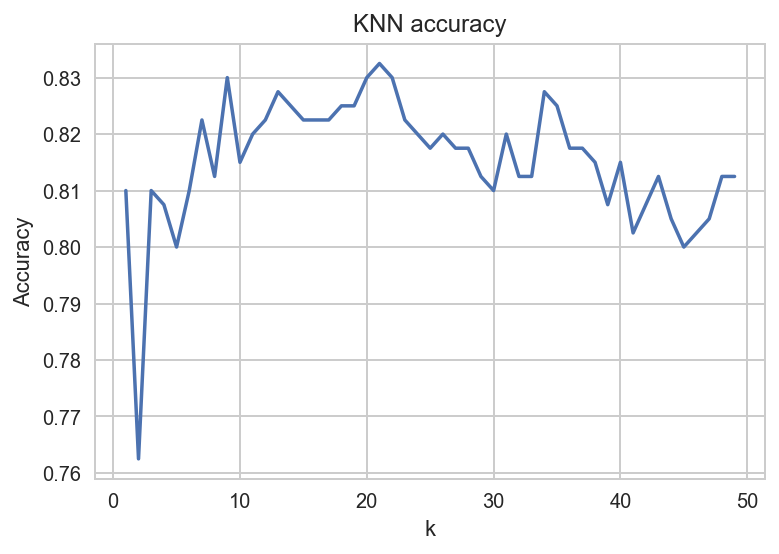

In [80]:
plt.plot(range(1,50),acc_list)
plt.title('KNN accuracy')
plt.ylabel('Accuracy')
plt.xlabel('k');

In [81]:
acc_list = []
for i in range(5):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    LRmodel = LogisticRegression(n_jobs=-1)
    LRmodel.fit(X_train,y_train)
    predict = LRmodel.predict(X_test)
    acc = accuracy(predict,y_test)
    acc_list.append(acc)
np.mean(acc_list), np.std(acc_list), LRmodel.coef_

(0.96618852459016402,
 0.0035492844417395037,
 array([[ 0.7 , -0.63,  0.05, ..., -0.11, -0.04,  0.3 ],
        [-0.15, -0.38,  0.01, ...,  0.03,  0.11, -0.17],
        [-1.5 ,  0.04,  0.01, ...,  0.02,  0.19,  0.21],
        ..., 
        [ 0.35,  1.05,  0.2 , ..., -0.17, -0.15,  0.32],
        [ 0.06, -0.16, -0.09, ..., -0.25,  0.16,  0.01],
        [-0.25, -0.13,  0.09, ..., -0.34, -0.  , -0.05]]))

In [82]:
len(LRmodel.coef_)

20

In [83]:
acc_list = []
new_user = GroupKFold(n_splits=8)
new_user.get_n_splits(X, y, df['user'])
for train_index, test_index in new_user.split(X, y, df['user']):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    LR = LogisticRegression(n_jobs=-1)
    
    LR.fit(X_train,y_train)
    predict = LR.predict(X_test)
    acc = accuracy(predict,y_test)
    acc_list.append(acc)
np.mean(acc_list), np.std(acc_list)

(0.86329495335673079, 0.041453067458107097)

### Logistic Regression did pretty well
## will now try a battery of models, using their default parameters, but the new grouped k-folds:

In [84]:
def ModelIt_Groups(LearningAlgorithm,X,y,groups = 8,multi=False):
    acc_list = []
    new_user = GroupKFold(groups)
    new_user.get_n_splits(X, y, df['user'])
    for train_index, test_index in new_user.split(X, y, df['user']):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        #print(len(y_test))
        if multi == True: model = LearningAlgorithm(n_jobs=-1)
        else: model = LearningAlgorithm()

        model.fit(X_train,y_train)
        predict = model.predict(X_test)
        acc = accuracy(predict,y_test)
        acc_list.append(acc)
    return np.mean(acc_list), np.std(acc_list)#,acc_list

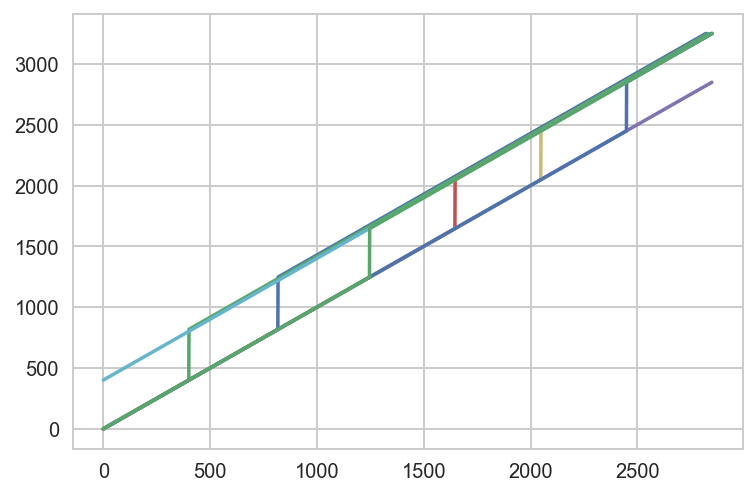

In [85]:
#confirming groups are being selected properly
new_user = GroupKFold(8)
new_user.get_n_splits(X, y, df['user'])
for train_index, test_index in new_user.split(X, y, df['user']):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    plt.plot(sorted(train_index))
    #plt.plot(sorted(test_index))

In [38]:
ModelIt_Groups(KNeighborsClassifier,X,y,multi=True)

(0.81528779635778759, 0.044748134895083572)

In [39]:
ModelIt_Groups(LogisticRegression,X,y,multi=True)

(0.87149417954707631, 0.041924939757830008)

In [40]:
ModelIt_Groups(GaussianNB,X,y)

(0.72758870151150734, 0.080908181783636082)

In [41]:
ModelIt_Groups(SVC,X,y)

(0.88344127787660209, 0.03857699776140272)

In [42]:
ModelIt_Groups(DecisionTreeClassifier,X,y)

(0.67170388067549136, 0.097092833186207483)

In [43]:
ModelIt_Groups(RandomForestClassifier,X,y,multi=True)

(0.755726605045555, 0.083640474543458881)

In [44]:
#ModelIt_Groups(GradientBoostingClassifier,X,y,multi=False)  #this one has to run in series, and is VERY slow

# WORK WITH THE BEST FEW
### LOGISTIC REGRESSION, SVC

In [86]:
groups = 8
acc_list = []
new_user = GroupKFold(groups)
new_user.get_n_splits(X, y, df['user'])
for train_index, test_index in new_user.split(X, y, df['user']):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    model = LogisticRegression()

    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy(predict,y_test)
    acc_list.append(acc)
np.mean(acc_list), np.std(acc_list)#,acc_list

(0.86329495335673079, 0.041453067458107097)

In [46]:
groups = 8
acc_list = []
new_user = GroupKFold(groups)
new_user.get_n_splits(X, y, df['user'])
for train_index, test_index in new_user.split(X, y, df['user']):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    model = SVC()

    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy(predict,y_test)
    acc_list.append(acc)
np.mean(acc_list), np.std(acc_list)#,acc_list

(0.88344127787660209, 0.03857699776140272)

## Best Models:  Logistic Regression, SV Machine

# Ensable of top couple models
### need to switch to using .probla

In [87]:
#USES TRAIN, TEST FROM LAST RUN 

ensable_prob_list = []
LRmodel = LogisticRegression(C=0.3,n_jobs=-1)
LRmodel.fit(X_train,y_train)
ensable_prob_list += [LRmodel.predict_proba(X_test)]

RFmodel = RandomForestClassifier(n_estimators=750, n_jobs=-1)
RFmodel.fit(X_train,y_train)
ensable_prob_list += [RFmodel.predict_proba(X_test)]

SVmodel = SVC(kernel='linear',C=0.01,probability=True)
SVmodel.fit(X_train,y_train)
ensable_prob_list += [SVmodel.predict_proba(X_test)]

#RBFmodel = SVC(kernel='rbf',C=2.25,probability=True)
#RBFmodel.fit(X_train,y_train)
#ensable_prob_list += [RBFmodel.predict_proba(X_test)]

n+=1
#print(len(ensable_prob_list),"models.  Fold number ",n)
#ensable_predict = sum([x*x for x in ensable_prob_list])**len(ensable_prob_list)  # combine the models
ensable_predict = sum(ensable_prob_list)/len(ensable_prob_list)  # combine the models   


ensable_predict

array([[  8.78e-01,   4.21e-02,   2.47e-03, ...,   1.16e-02,   1.49e-03,
          1.08e-03],
       [  8.89e-01,   2.84e-02,   4.98e-03, ...,   1.14e-02,   7.28e-03,
          8.59e-04],
       [  7.96e-01,   5.60e-02,   9.92e-03, ...,   2.50e-02,   1.49e-02,
          3.65e-03],
       ..., 
       [  1.95e-02,   4.48e-02,   3.49e-03, ...,   4.57e-03,   2.72e-02,
          7.66e-01],
       [  1.85e-02,   7.52e-02,   5.56e-03, ...,   4.00e-03,   2.06e-02,
          7.09e-01],
       [  2.09e-02,   7.75e-02,   6.38e-03, ...,   2.73e-03,   2.28e-02,
          6.42e-01]])

In [88]:
def ModelIt_Groups(LearningAlgorithm,X,y,groups = 8,multi=False):
    acc_list = []
    new_user = GroupKFold(groups)
    new_user.get_n_splits(X, y, df['user'])
    for train_index, test_index in new_user.split(X, y, df['user']):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
        y_train, y_test = y[train_index], y[test_index]

        if multi == True: model = LearningAlgorithm(n_jobs=-1)
        else: model = LearningAlgorithm()

        model.fit(X_train,y_train)
        predict = model.predict(X_test)
        acc = accuracy(predict,y_test)
        acc_list.append(acc)
    return np.mean(acc_list), np.std(acc_list)#,acc_list

In [89]:
def classify_from_multi_probs(probs):
    length, N_classes = probs.shape
    
    arg_list = []
    for i in range(length):
        arg_list.append( ensable_predict[i,:].argmax() + 1 )  #I have to zero class, classes start at 1
    return arg_list

In [90]:
ensable_classified = classify_from_multi_probs(ensable_predict)

In [91]:
accuracy(ensable_classified,y_test)

0.915

In [92]:
#what types of mistakes are being made?
y_test_list = list(y_test)
missed_list_correct = []
missed_list_bad_guess = []
missed_list_filenames = []
for i in range(len(ensable_classified)):
    if y_test_list[i] != ensable_classified[i]:
        missed_list_correct.append(y_test_list[i])
        missed_list_bad_guess.append(ensable_classified[i])
        f = df['filename'].iloc[y_test.index[i]]
        missed_list_filenames.append(f)
        #print(y_test.index[i],y_test.iloc[i],df['filename'].iloc[y_test.index[i]])
        print("Gesture",y_test_list[i], "Misclassified as",ensable_classified[i], "this was element #",i,"filename: ",f)

Gesture 2 Misclassified as 15 this was element # 28 filename:  gestures-dataset/U04/02/09.txt
Gesture 3 Misclassified as 10 this was element # 43 filename:  gestures-dataset/U04/03/04.txt
Gesture 3 Misclassified as 2 this was element # 54 filename:  gestures-dataset/U04/03/15.txt
Gesture 3 Misclassified as 1 this was element # 57 filename:  gestures-dataset/U04/03/18.txt
Gesture 3 Misclassified as 16 this was element # 59 filename:  gestures-dataset/U04/03/20.txt
Gesture 7 Misclassified as 5 this was element # 121 filename:  gestures-dataset/U04/07/02.txt
Gesture 7 Misclassified as 8 this was element # 133 filename:  gestures-dataset/U04/07/14.txt
Gesture 7 Misclassified as 5 this was element # 134 filename:  gestures-dataset/U04/07/15.txt
Gesture 8 Misclassified as 7 this was element # 158 filename:  gestures-dataset/U04/08/19.txt
Gesture 9 Misclassified as 8 this was element # 161 filename:  gestures-dataset/U04/09/02.txt
Gesture 9 Misclassified as 10 this was element # 163 filename:

In [93]:
missed_list_filenames

['gestures-dataset/U04/02/09.txt',
 'gestures-dataset/U04/03/04.txt',
 'gestures-dataset/U04/03/15.txt',
 'gestures-dataset/U04/03/18.txt',
 'gestures-dataset/U04/03/20.txt',
 'gestures-dataset/U04/07/02.txt',
 'gestures-dataset/U04/07/14.txt',
 'gestures-dataset/U04/07/15.txt',
 'gestures-dataset/U04/08/19.txt',
 'gestures-dataset/U04/09/02.txt',
 'gestures-dataset/U04/09/04.txt',
 'gestures-dataset/U04/09/05.txt',
 'gestures-dataset/U04/09/06.txt',
 'gestures-dataset/U04/09/07.txt',
 'gestures-dataset/U04/09/08.txt',
 'gestures-dataset/U04/09/09.txt',
 'gestures-dataset/U04/09/10.txt',
 'gestures-dataset/U04/09/11.txt',
 'gestures-dataset/U04/09/12.txt',
 'gestures-dataset/U04/09/15.txt',
 'gestures-dataset/U04/09/16.txt',
 'gestures-dataset/U04/09/17.txt',
 'gestures-dataset/U04/09/18.txt',
 'gestures-dataset/U04/09/19.txt',
 'gestures-dataset/U04/10/11.txt',
 'gestures-dataset/U04/10/16.txt',
 'gestures-dataset/U04/10/17.txt',
 'gestures-dataset/U04/11/09.txt',
 'gestures-dataset/U

In [94]:
all_pairs = list(zip(y_test_list,ensable_classified))  #good/bad
from collections import defaultdict
all_pairs_count = defaultdict(int)
for n in all_pairs:
    all_pairs_count[n] += 1
all_pairs_count

defaultdict(int,
            {(1, 1): 20,
             (2, 2): 19,
             (2, 15): 1,
             (3, 1): 1,
             (3, 2): 1,
             (3, 3): 16,
             (3, 10): 1,
             (3, 16): 1,
             (4, 4): 20,
             (5, 5): 20,
             (6, 6): 20,
             (7, 5): 2,
             (7, 7): 17,
             (7, 8): 1,
             (8, 7): 1,
             (8, 8): 19,
             (9, 1): 1,
             (9, 2): 1,
             (9, 7): 1,
             (9, 8): 2,
             (9, 9): 5,
             (9, 10): 10,
             (10, 2): 1,
             (10, 8): 2,
             (10, 10): 17,
             (11, 6): 1,
             (11, 11): 17,
             (11, 14): 1,
             (11, 16): 1,
             (12, 12): 20,
             (13, 13): 19,
             (13, 14): 1,
             (14, 14): 20,
             (15, 15): 20,
             (16, 16): 20,
             (17, 17): 20,
             (18, 18): 20,
             (19, 9): 1,
             (19, 10)

In [95]:
all_pairs = list(zip(y_test_list,ensable_classified))  #good/bad
from collections import defaultdict
bad_pairs_count = defaultdict(int)
for n in all_pairs:
    if n[0] != n[1]:
        bad_pairs_count[n] += 1
bad_pairs_count

defaultdict(int,
            {(2, 15): 1,
             (3, 1): 1,
             (3, 2): 1,
             (3, 10): 1,
             (3, 16): 1,
             (7, 5): 2,
             (7, 8): 1,
             (8, 7): 1,
             (9, 1): 1,
             (9, 2): 1,
             (9, 7): 1,
             (9, 8): 2,
             (9, 10): 10,
             (10, 2): 1,
             (10, 8): 2,
             (11, 6): 1,
             (11, 14): 1,
             (11, 16): 1,
             (13, 14): 1,
             (19, 9): 1,
             (19, 10): 1,
             (20, 10): 1})

In [96]:
from collections import defaultdict
missed_count = defaultdict(int)
for n in missed_list_correct:
    missed_count[n] += 1
missed_count

defaultdict(int,
            {2: 1, 3: 4, 7: 3, 8: 1, 9: 15, 10: 3, 11: 3, 13: 1, 19: 2, 20: 1})

In [97]:
missed_count_guesses = defaultdict(int)
for n in missed_list_correct:
    missed_count_guesses[n] += 1
missed_count_guesses

defaultdict(int,
            {2: 1, 3: 4, 7: 3, 8: 1, 9: 15, 10: 3, 11: 3, 13: 1, 19: 2, 20: 1})

In [98]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [99]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, ensable_classified)
np.set_printoptions(precision=2)

Confusion matrix, without normalization


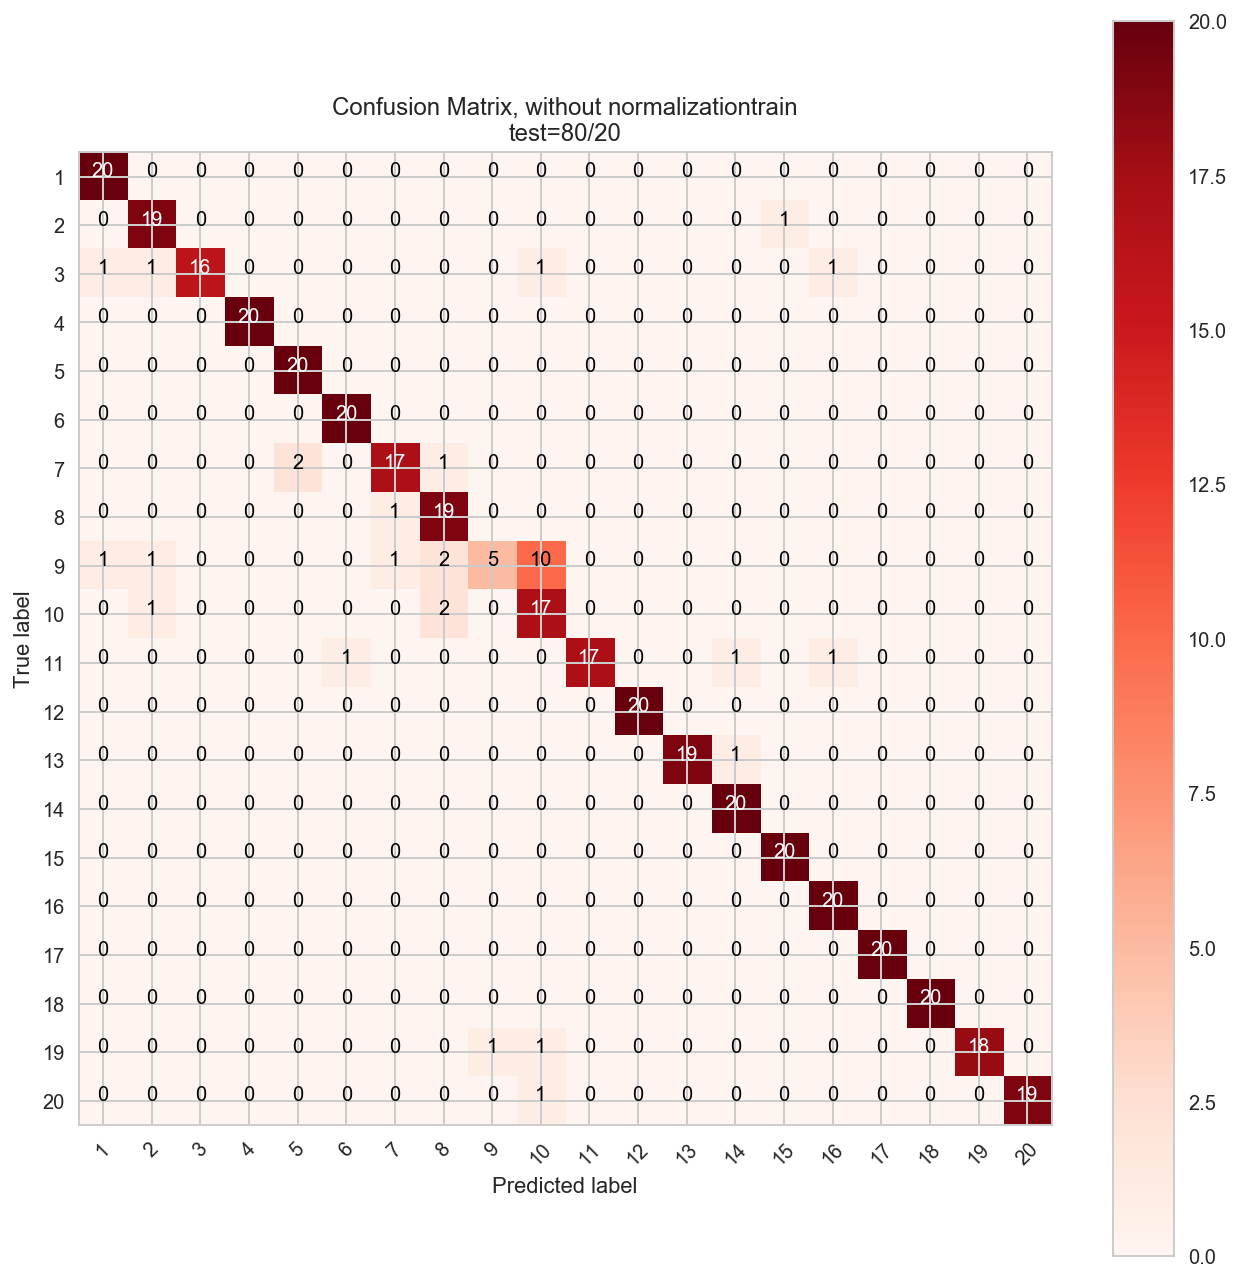

In [106]:
# Plot non-normalized confusion matrix
fig, ax = plt.subplots(figsize=(9,9))
plot_confusion_matrix(cnf_matrix, classes=range(1,20+1),
                      title='Confusion Matrix, without normalizationtrain\ntest=80/20')
fig.savefig("ConfusionMatrixGroupedKfold.png",transparent=True)

Normalized confusion matrix


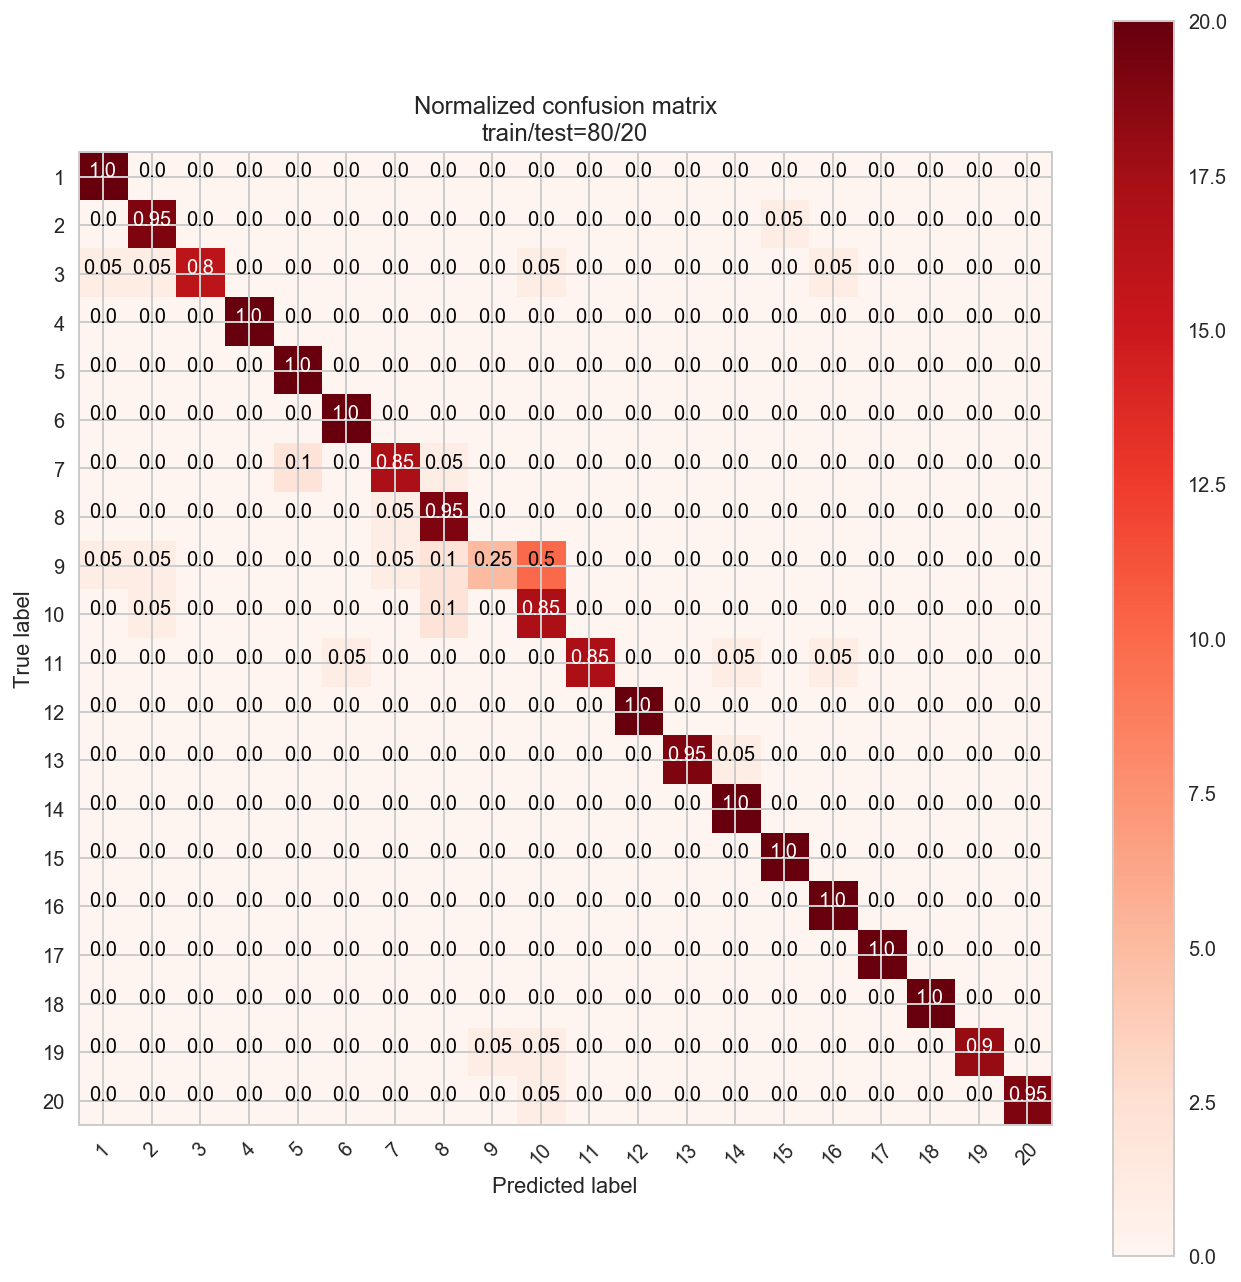

In [107]:
# Plot normalized confusion matrix
fig, ax = plt.subplots(figsize=(9,9))
plot_confusion_matrix(cnf_matrix, classes=range(1,20+1), normalize=True,
                      title='Normalized confusion matrix\ntrain/test=80/20')
fig.savefig("ConfusionMatrixGroupedKfold_norm.png",transparent=True)

Take a look a the ones that were missed:

In [102]:
def butter_one(gestdict):
    import scipy.signal as signal
    N  = 2    # Filter order
    Wn = 0.3 # Cutoff frequency   0.2 and 0.4  were worse than 0.3
    B, A = signal.butter(N, Wn, output='ba')
    Buttered_Data = []
    
    n_plots = len(gestdict.keys())
    
    for key in gestdict.keys():
        # Second, apply the filter
        gestdict[key] = signal.filtfilt(B,A, gestdict[key],padlen = int(2.5 * max(len(A), len(B))))
    Buttered_Data = gestdict
    #print(Buttered_Data)
    return Buttered_Data

In [108]:
def plotfile(filename):
    raw = np.loadtxt(filename)
    test = raw[:,3:6]
    gestdict = {}
    gestdict['x'] = raw[:,3]
    gestdict['y'] = raw[:,4]
    gestdict['z'] = raw[:,5]
    filtered_dict = butter_one(gestdict)
    
    
        #'gestures-dataset/U04/03/03.txt'
    #load the user's first trial of the gesture
    first_filename = filename[:24]+"01.txt"
    raw = np.loadtxt(first_filename)
    test = raw[:,3:6]
    gestdict = {}
    gestdict['x'] = raw[:,3]
    gestdict['y'] = raw[:,4]
    gestdict['z'] = raw[:,5]
    filtered_dict_1st = butter_one(gestdict)

    #load user 1's first trial of the gesture
    U1_filename = filename[:17]+"U01"+filename[20:24]+"01.txt"
    raw = np.loadtxt(U1_filename)
    test = raw[:,3:6]
    gestdict = {}
    gestdict['x'] = raw[:,3]
    gestdict['y'] = raw[:,4]
    gestdict['z'] = raw[:,5]
    filtered_dict_U1 = butter_one(gestdict)
    
    fig, ax =  plt.subplots(ncols = 3, nrows=1,figsize=(12, 2))
    for i in ['x','y','z']:
        ax[0].set_title(file)
        ax[0].plot(filtered_dict[i])
    for i in ['x','y','z']:
        ax[1].set_title(first_filename)
        ax[1].plot(filtered_dict_1st[i])
    for i in ['x','y','z']:
        ax[2].set_title(U1_filename)
        ax[2].plot(filtered_dict_U1[i])
    fig.savefig("Missclassified.png",transparent=True)
    fig.show()

/Users/dlicht/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/dlicht/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


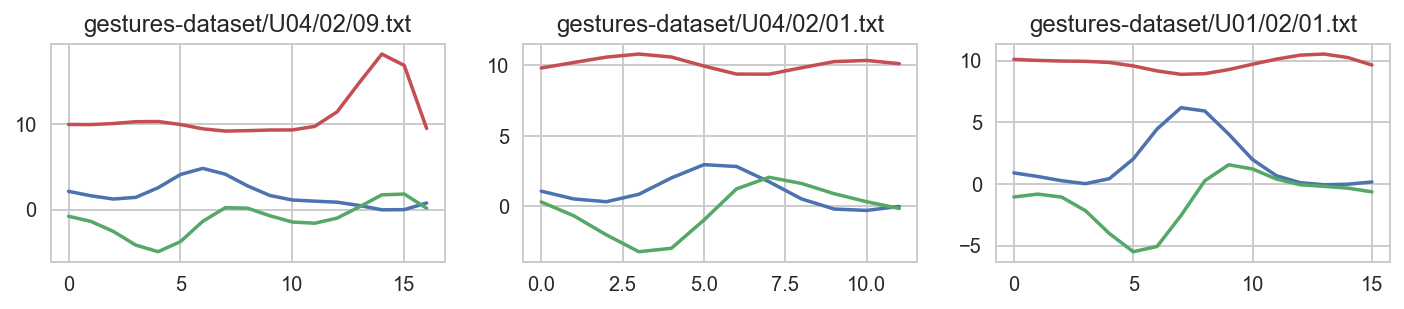

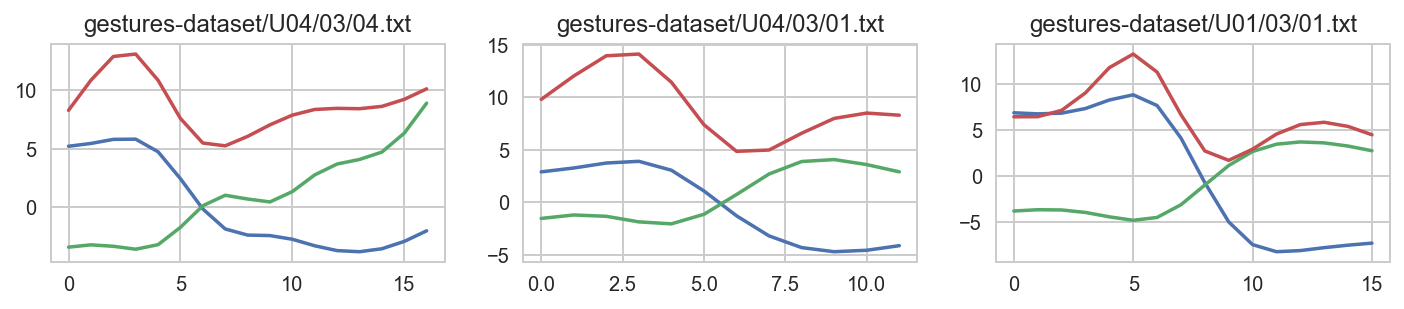

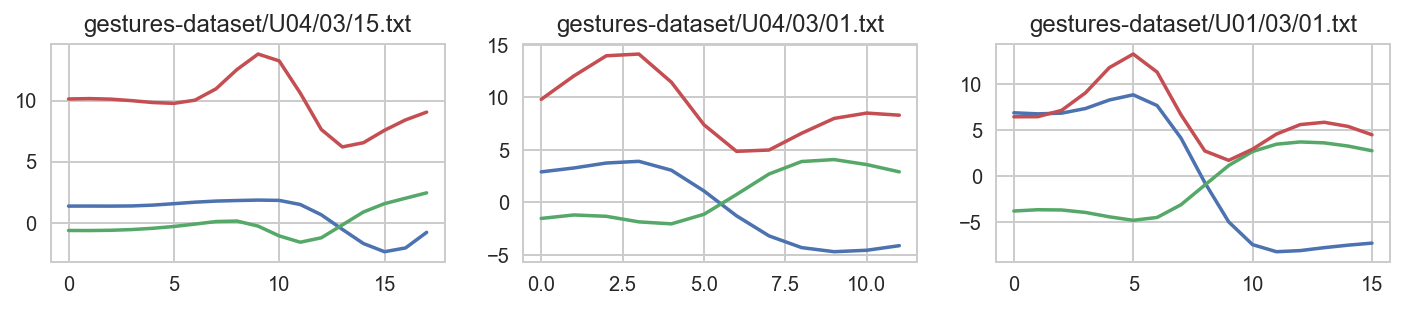

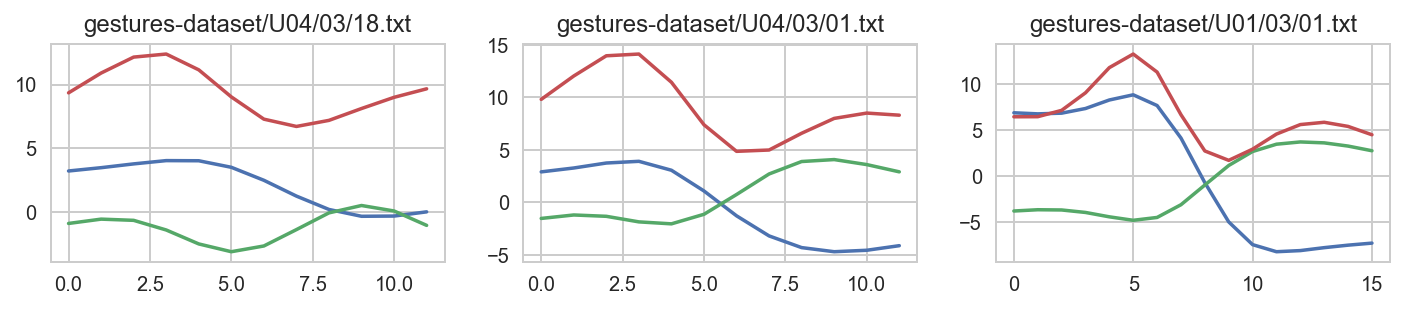

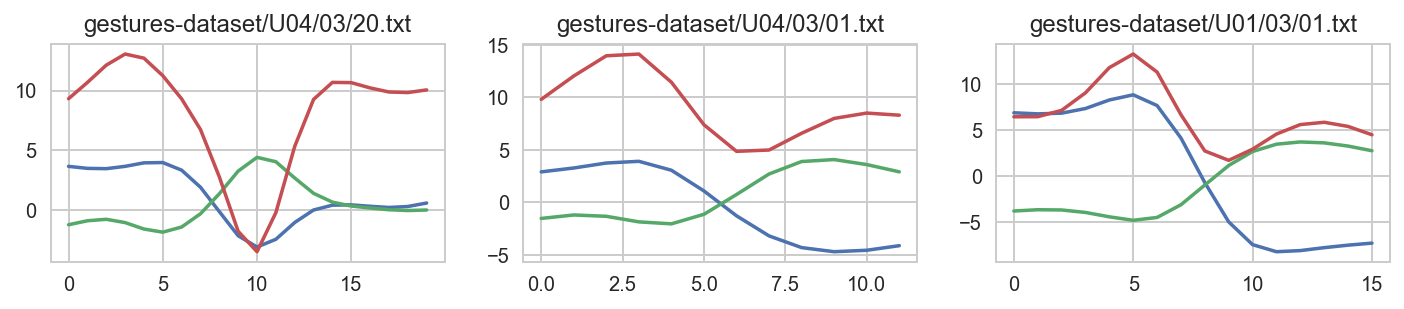

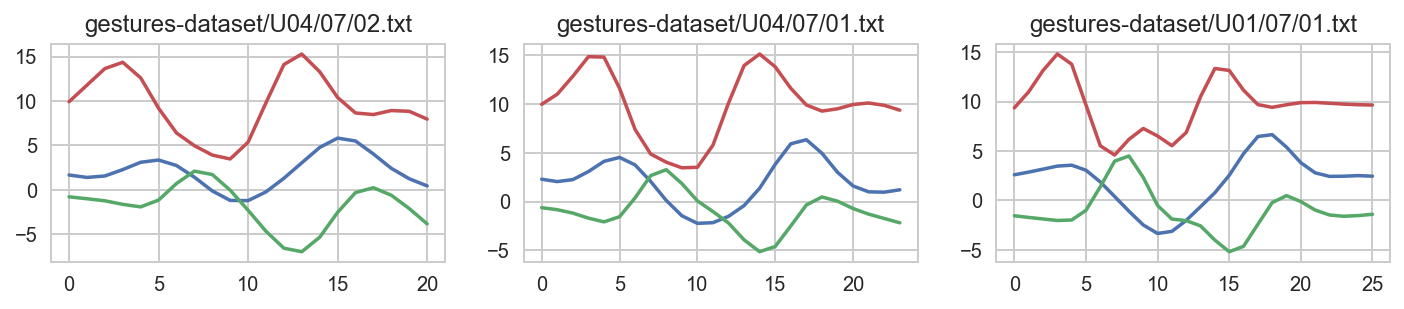

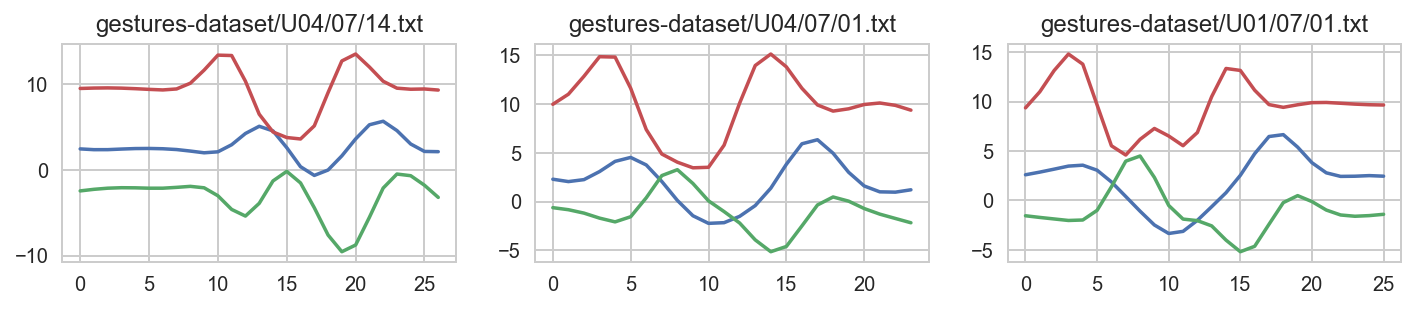

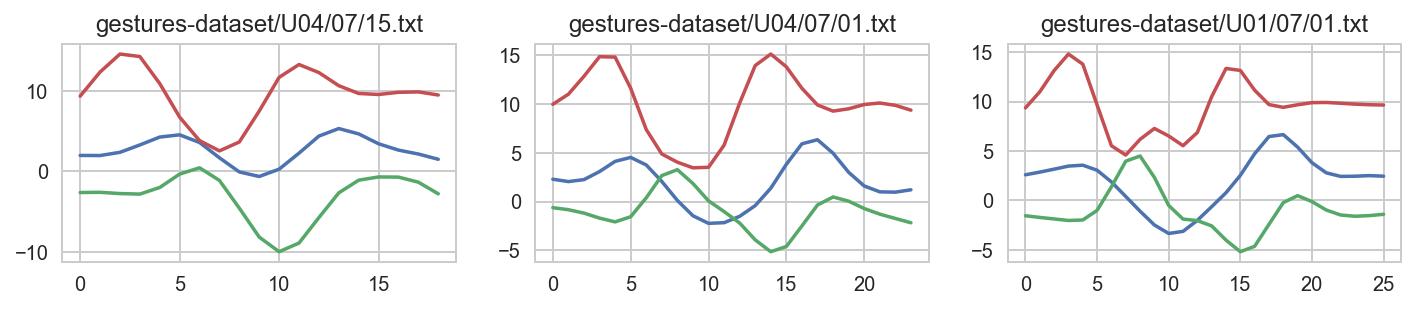

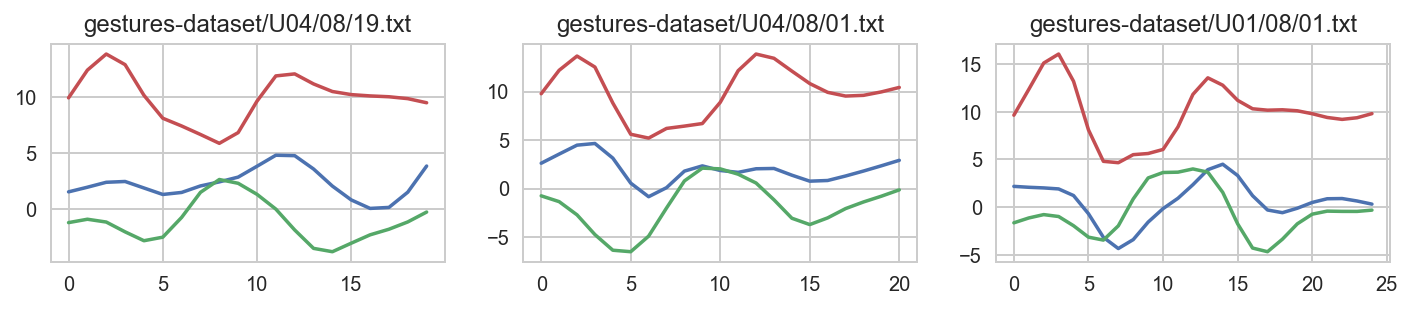

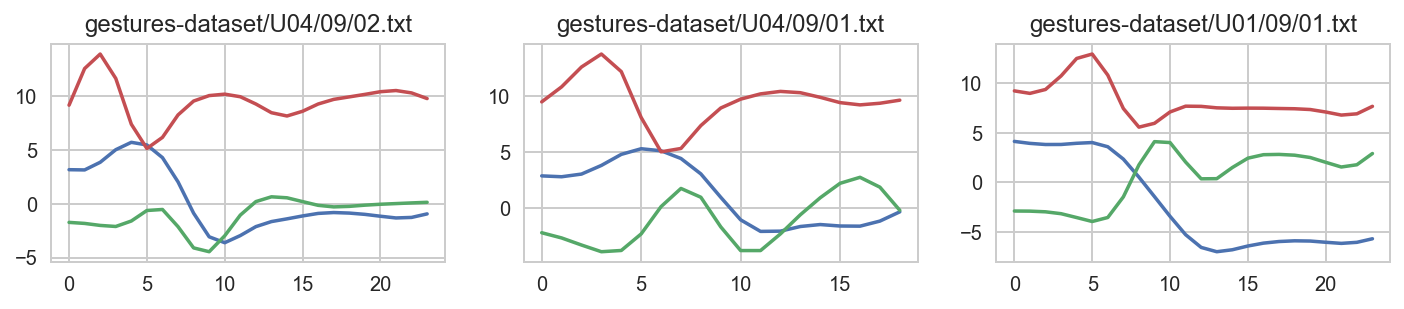

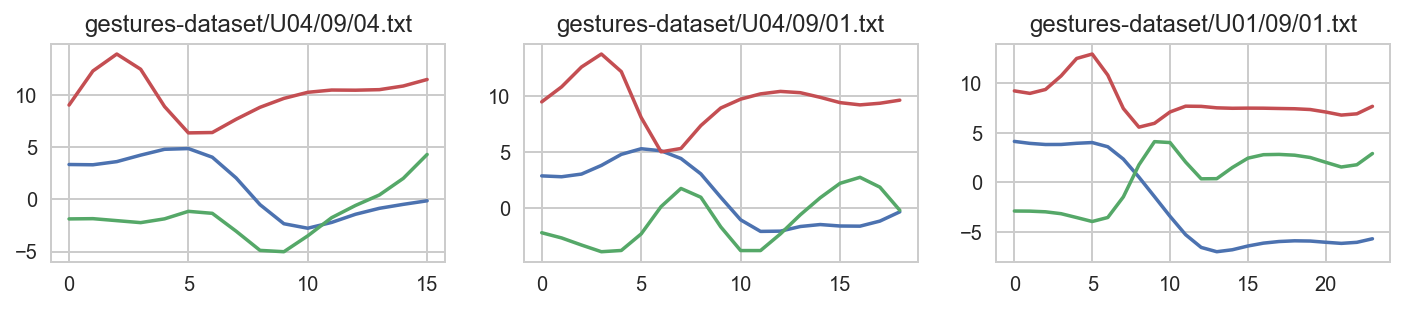

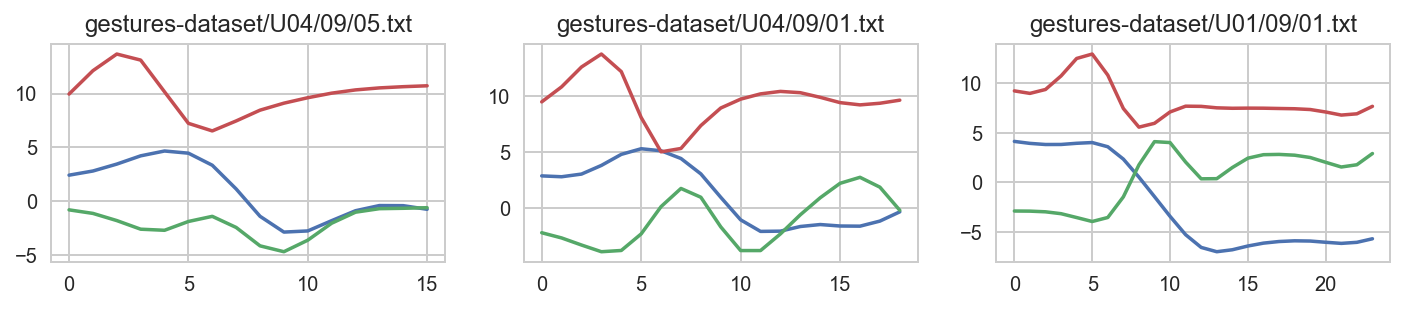

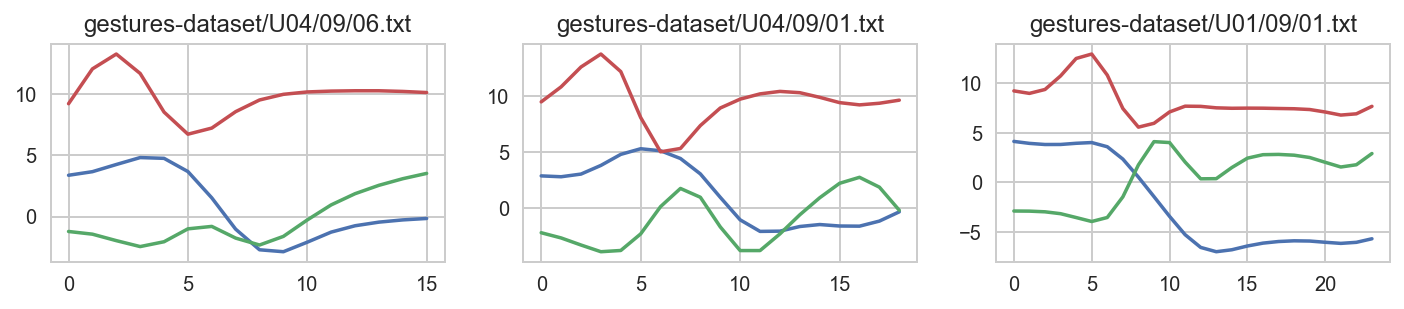

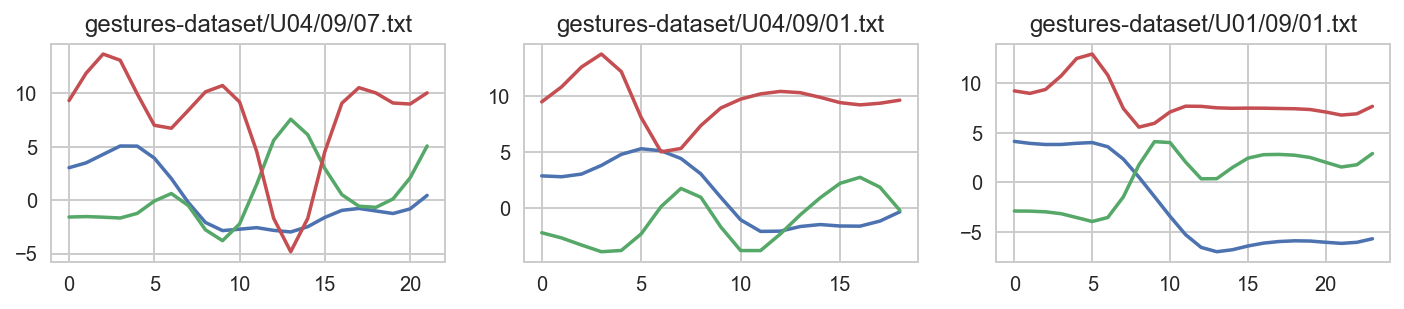

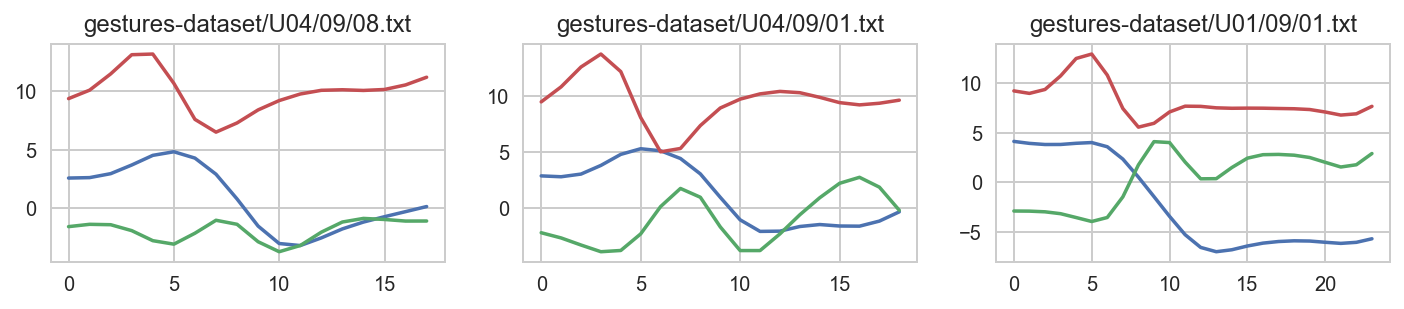

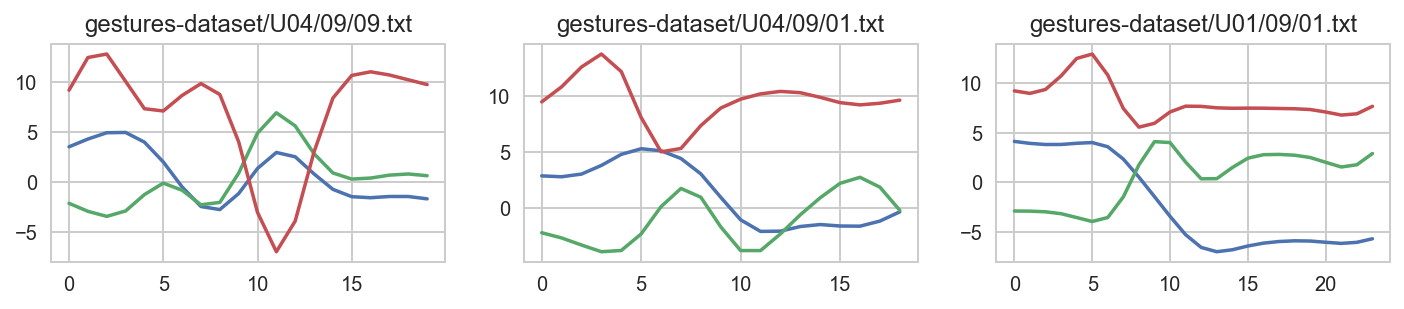

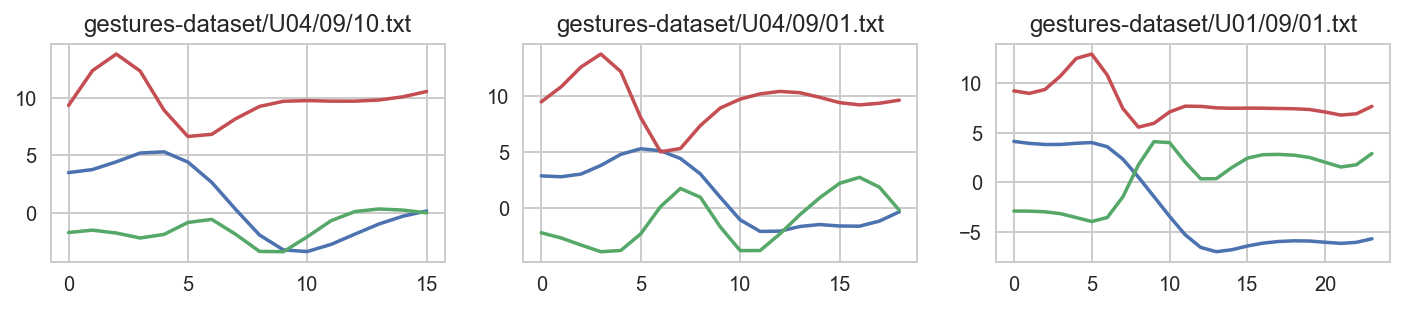

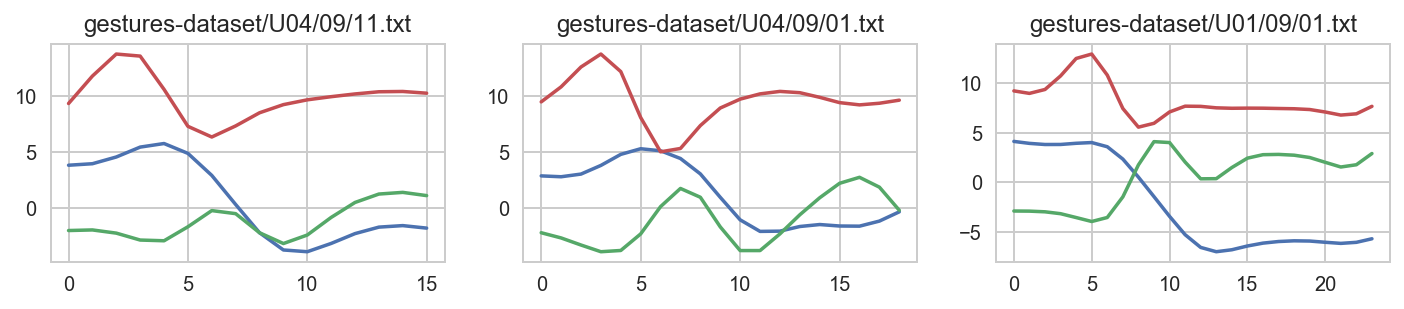

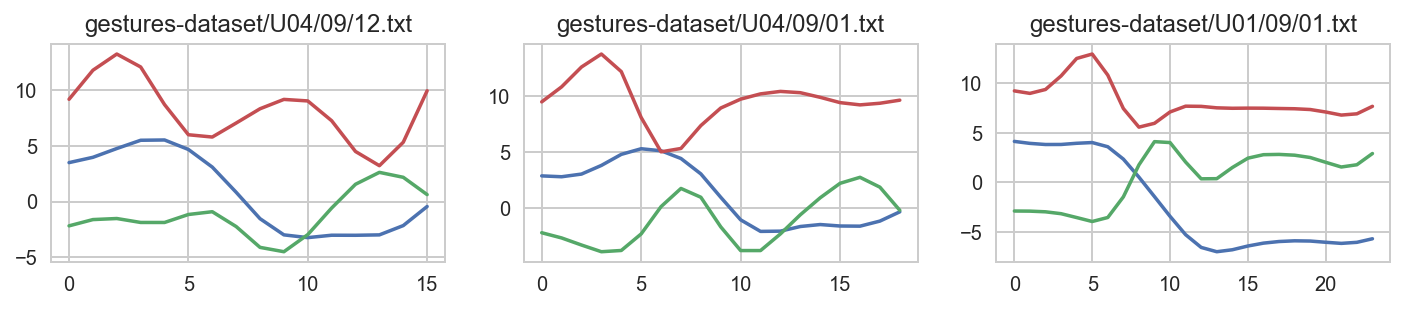

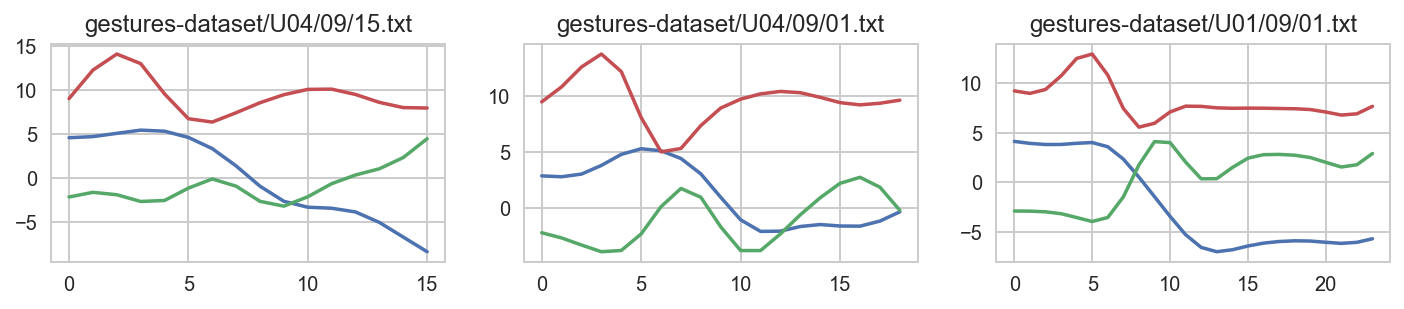

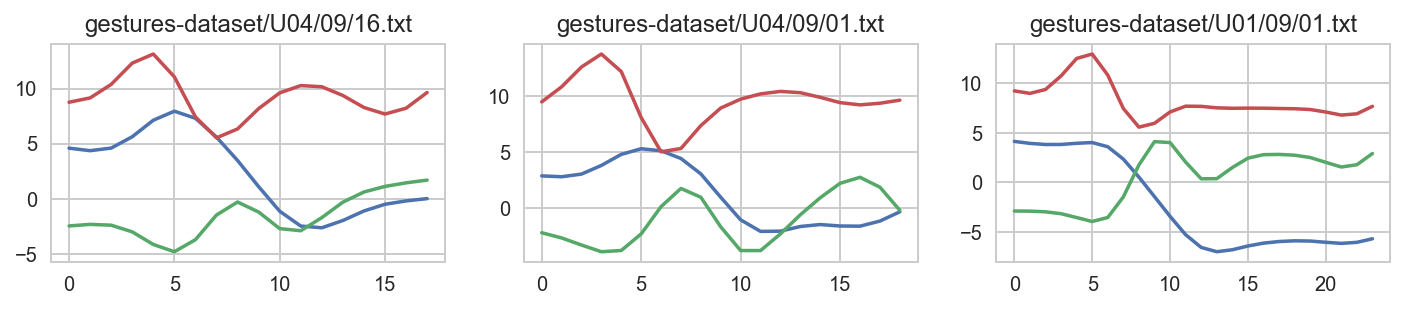

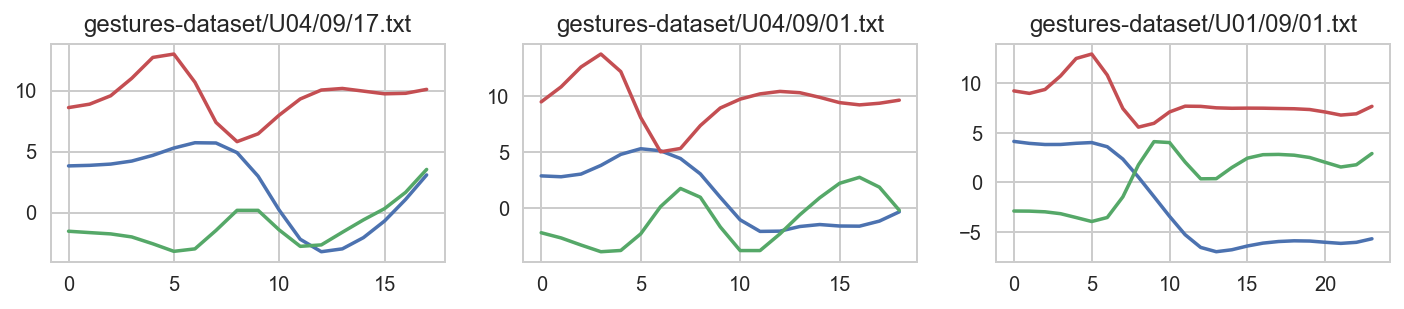

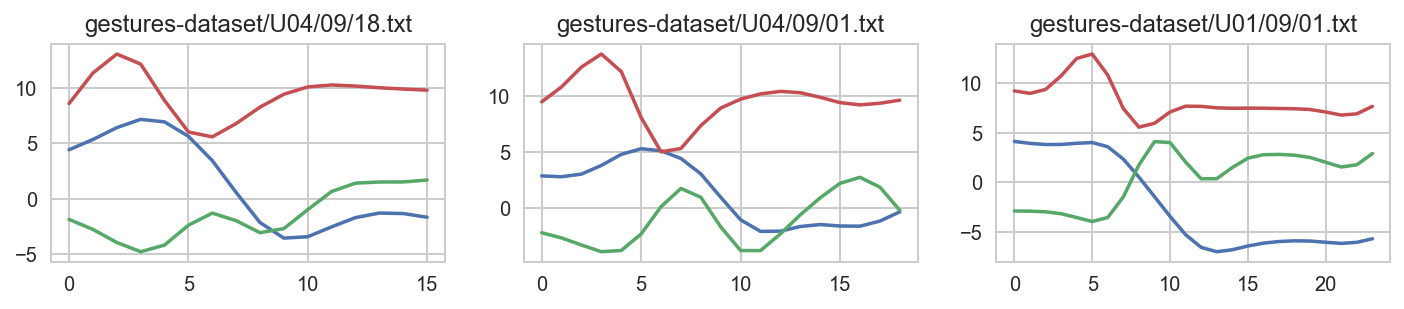

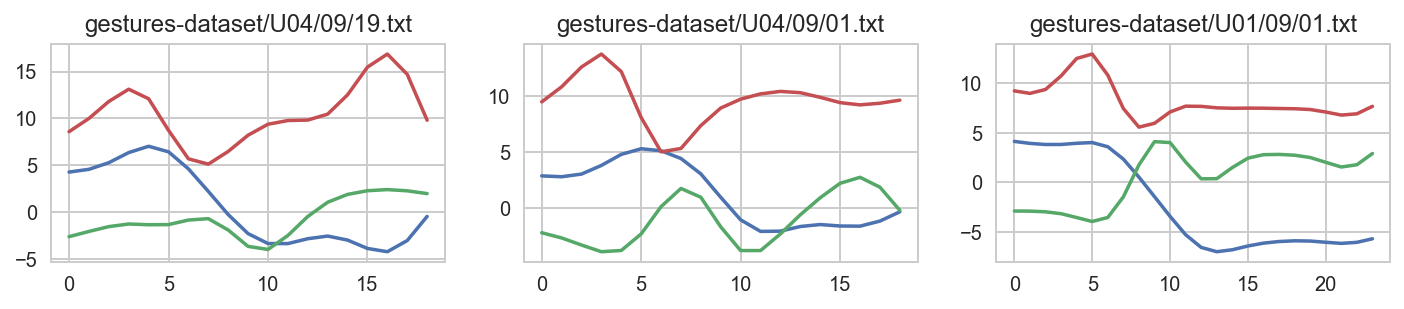

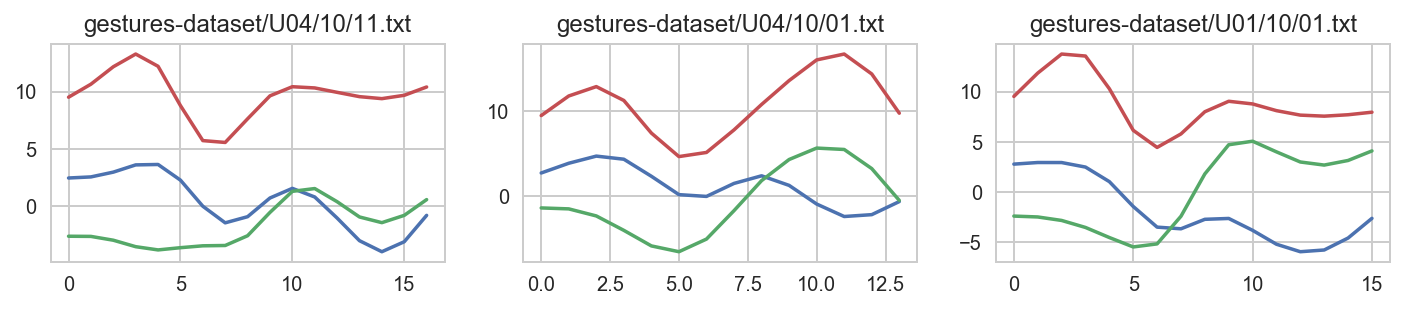

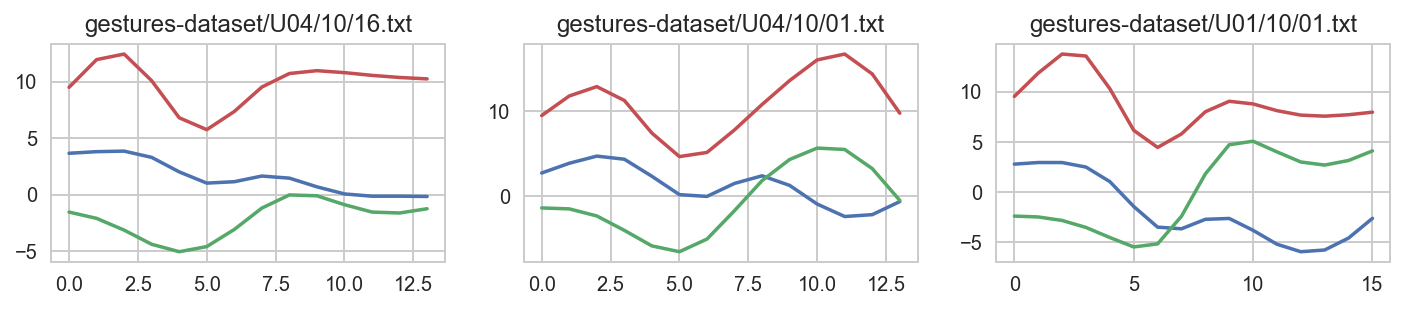

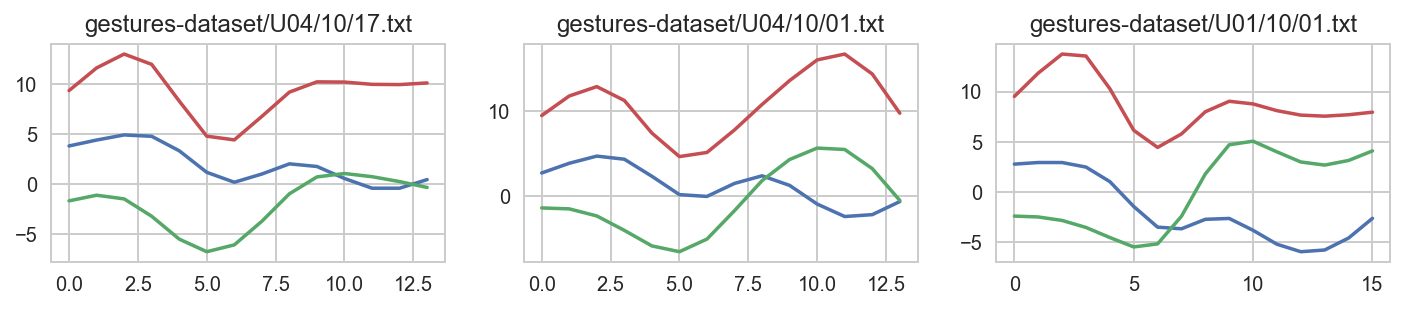

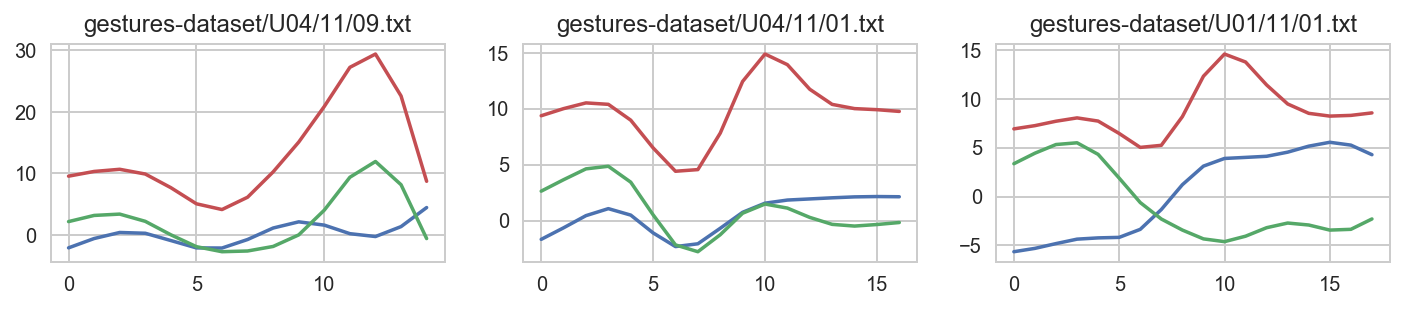

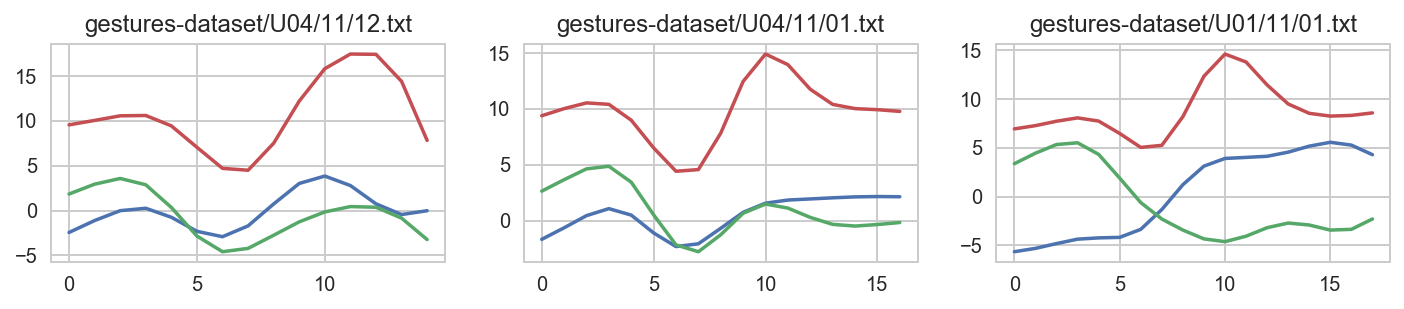

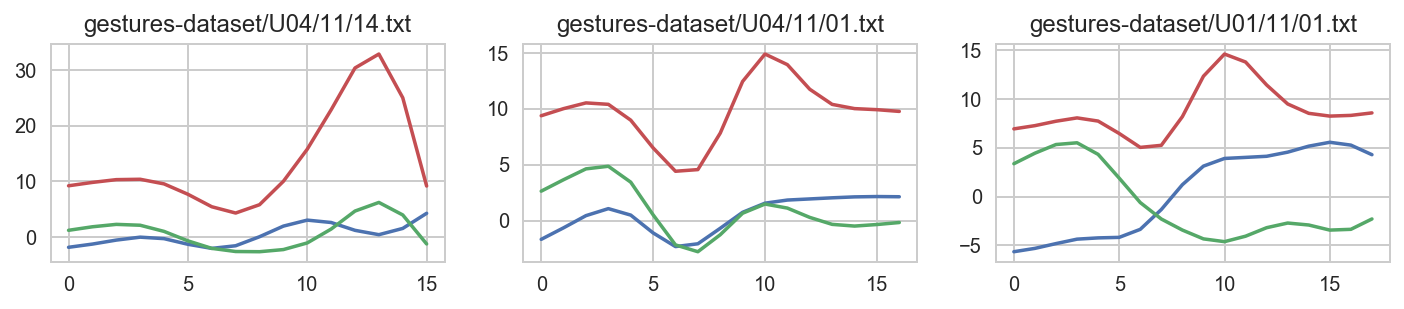

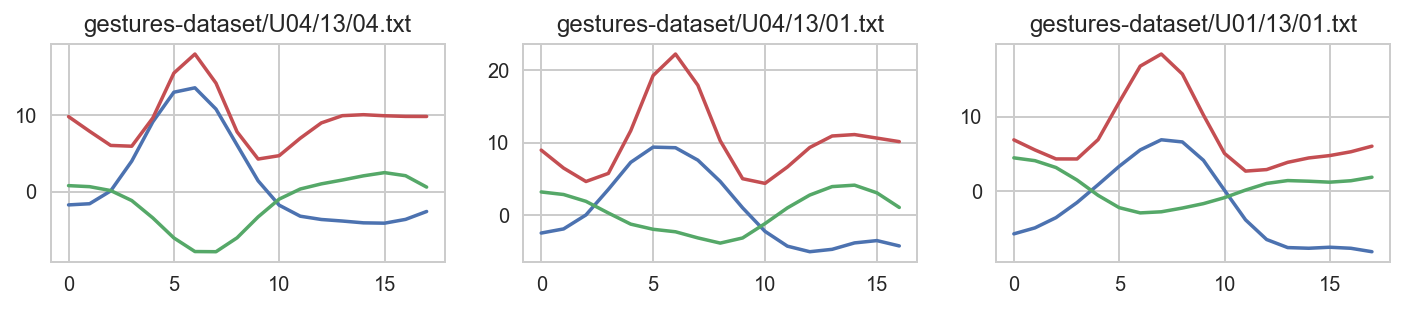

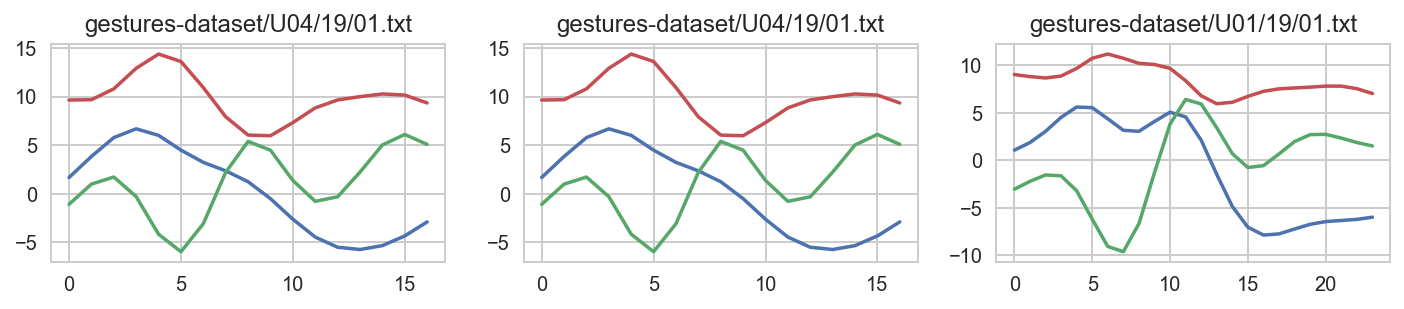

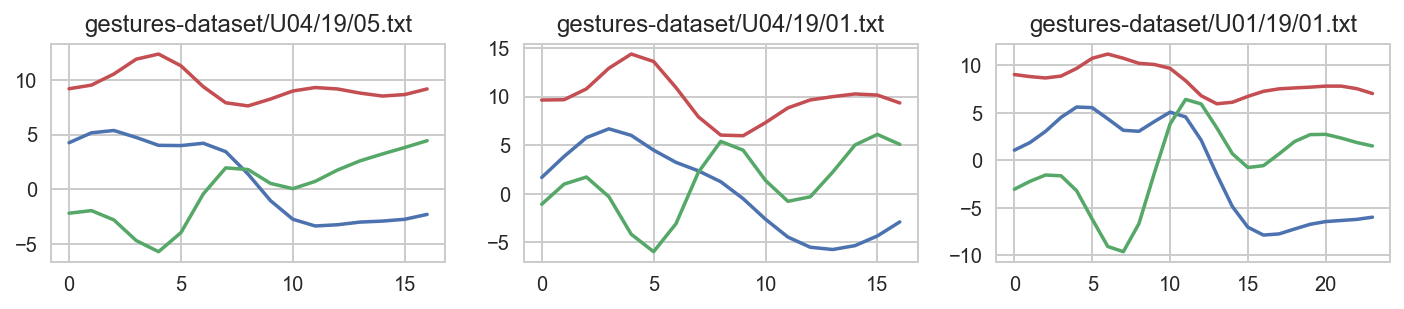

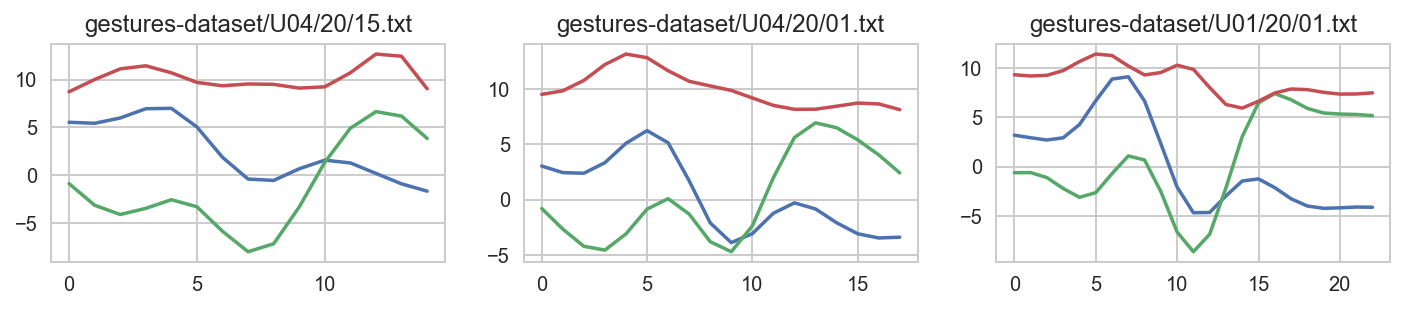

In [109]:
for file in missed_list_filenames[:]:
    plotfile(file)

In [65]:
missed_list_filenames[1]

'gestures-dataset/U04/03/03.txt'